In [3]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import json
from sklearn.ensemble import RandomForestRegressor

In [4]:
### Подготавливаем данные

In [5]:
with open("/home/GroundResponseData4ML-Max-Smoothing.dat") as f:
  lines = f.readlines()
  #print(len(lines))
  #print(lines[1])
  lines_copy = lines[1][:-1]
  values_names = lines[0].split(" ")
  #print(values_names)
  num_of_val_names = len(values_names) - 1
  #print(num_of_val_names)
  values_lists = lines_copy.split(" ")[1:]

  values_lists_len = len(values_lists)
  cur_val = 0

  result_list_vals = []

  while cur_val < values_lists_len:
    result_list_vals.append(values_lists[cur_val: cur_val + num_of_val_names])
    cur_val += num_of_val_names
  
  print(len(result_list_vals))


548


In [6]:
result_data_list = []
for station in result_list_vals:
  cur_dict = {}

  # Удаляем NaN 
  #if station[0] == 'NaN' or station[1] == 'NaN' or station[2] == 'NaN' or station[3] == 'NaN' or station[4] == 'NaN' or station[5] == 'NaN' or station[6] == 'NaN':
  #  continue

  cur_dict['AW'] = float(station[0])
  cur_dict['BF'] = float(station[1])
  cur_dict['BJ'] = float(station[2])
  cur_dict['DL'] = float(station[3])
  cur_dict['DM'] = float(station[4])
  cur_dict['DP'] = float(station[5])
  cur_dict['DQ'] = float(station[6])
  cur_ew_list = []
  for i in range(0, 17):
    cur_ew_list.append(float(station[7 + i]))
  cur_dict['EW_list'] = cur_ew_list

  cur_ns_list = []
  for i in range(0, 17):
    cur_ns_list.append(float(station[24 + i]))
  cur_dict['NS_list'] = cur_ns_list

  cur_ud_list = []
  for i in range(0, 17):
    cur_ud_list.append(float(station[41 + i]))
  cur_dict['UD_list'] = cur_ud_list
  result_data_list.append(cur_dict)

print(len(result_data_list))

548


In [7]:
# Заменим все NaN значения на среднии

import math
# Посчитаем среднее
def avg_param(peak_param_str):
  cur_sum = 0
  cur_count = 0
  for x in result_data_list:
    if not math.isnan(x[peak_param_str]):
      cur_sum += x[peak_param_str] 
      cur_count += 1
  print(f'Non NaN for {peak_param_str} = {cur_count}')
  return cur_sum / cur_count

avg_aw = avg_param('AW')
avg_bf = avg_param('BF')
avg_bj = avg_param('BJ')
avg_dl = avg_param('DL')
avg_dm = avg_param('DM')
avg_dp = avg_param('DP')
avg_dq = avg_param('DQ')

# Replace NaN with average
def change_nan(param_str, avg_val):
  for x in result_data_list:
    if math.isnan(x[param_str]):
      x[param_str] = avg_val

change_nan("AW", avg_aw)
change_nan("BF", avg_bf)
change_nan("BJ", avg_bj)
change_nan("DL", avg_dl)
change_nan("DM", avg_dm)
change_nan("DP", avg_dp)
change_nan("DQ", avg_dq)


Non NaN for AW = 514
Non NaN for BF = 395
Non NaN for BJ = 395
Non NaN for DL = 467
Non NaN for DM = 467
Non NaN for DP = 467
Non NaN for DQ = 467


In [8]:
# Нормализуем входные параметры
def norm_peak_param(peak_param_str):
  peak_param_dl = [x[peak_param_str] for x in result_data_list]
  max_param_dl = max(peak_param_dl)
  min_param_dl = min(peak_param_dl)
  #print(result_data_list[0][peak_param_str])
  for elem in result_data_list:
    elem[peak_param_str] = (elem[peak_param_str] - min_param_dl) / (max_param_dl - min_param_dl)

  #print(result_data_list[0][peak_param_str])

norm_peak_param("AW")
norm_peak_param("BF")
norm_peak_param("BJ")
norm_peak_param("DL")
norm_peak_param("DM")
norm_peak_param("DP")
norm_peak_param("DQ")
print(len(result_data_list))

548


In [9]:
# Создание массива признаков X и целевых переменных Y
X = np.array([[d['AW'], d['BF'], d['BJ'], d['DL'], d['DM'], d['DP'], d['DQ']] for d in result_data_list])
Y = np.array([[d['EW_list']] for d in result_data_list])
X = X.reshape(X.shape[0], -1)
Y = Y.reshape(X.shape[0], -1)
print(X[0])
print(X.shape)
print(Y.shape)

[0.42706858 0.76667033 0.00666667 0.25356355 0.14596066 0.2702253
 0.15189532]
(548, 7)
(548, 17)


In [10]:
# Разбиение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.17, random_state=29)

In [11]:
print(y_test[0])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[2.363452 2.492504 2.62542  2.767078 2.913855 3.043525 3.108503 3.038716
 2.780105 2.396692 1.996494 1.65296  1.39753  1.231053 1.134561 1.078189
 1.03535 ]
(454, 7)
(94, 7)
(454, 17)
(94, 17)


In [12]:
### Попробуем Random Forest

In [13]:
# Создание и обучение модели Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=29)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=29)

R2 score: 0.18381272838015536
[4.58634  4.188183 3.78435  3.524673 3.834473 4.834884 5.719469 5.616253
 4.60878  3.416059 2.687841 2.37737  2.067426 1.641794 1.326678 1.205903
 1.195334]
[4.26528782 4.08455402 3.87479146 3.7334834  3.94562117 4.15938191
 3.97718696 3.94304074 3.84014364 3.76298205 2.73907262 2.59223163
 2.33027966 2.15759891 2.41865861 2.74013738 3.44217639]


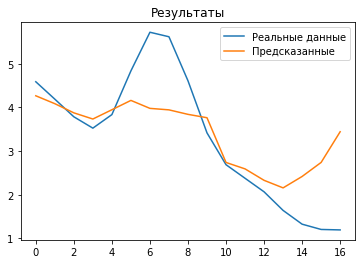

In [14]:
# Оценка точности модели на тестовом наборе
score = rf.score(X_test, y_test)
print("R2 score:", score)

# Создаем новый график
fig, ax = plt.subplots()

# Выполняем предсказание на тестовых данных (X_test - матрица признаков)
y_pred = rf.predict(X_test)

ax.plot(y_test[4], label='Реальные данные')
ax.plot(y_pred[4], label='Предсказанные')

print(y_test[4])
print(y_pred[4])

ax.legend()
ax.set_title('Результаты')

plt.show()

MAE: 2.1572277310243457
MSE: 13.622790834981483
R2: 0.18381272838015536
[5.873571 5.413506 4.912816 4.845392 5.749777 6.491088 5.511158 3.733416
 2.221762 1.698014 1.586852 1.609144 1.906781 2.399164 3.115335 3.647929
 3.4931  ]
[5.30407428 5.18725196 4.95892401 4.63523112 5.17071388 6.02474488
 5.74963768 4.17515781 3.40072459 3.04272901 2.56922516 2.56384779
 2.6769874  3.01459455 4.45667771 7.06607126 8.05104592]


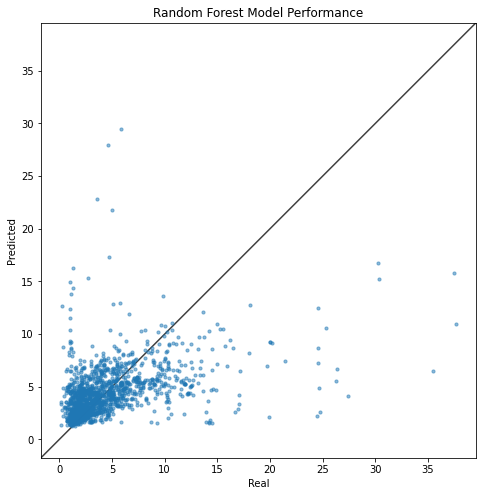

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Вычисляем метрики качества предсказания
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим метрики качества предсказания
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

# Строим график истинных значений и предсказанных значений
print(y_test[7])
print(y_pred[7])

# Создаем график
fig, ax = plt.subplots(figsize=(8, 8))
# Добавляем scatter plot
ax.scatter(y_test, y_pred, alpha=0.5, s=10)

# Добавляем линию y = x
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
ax.set_title('Random Forest Model Performance')

plt.show()

In [16]:
### Попробуем линейную регрессию

In [17]:
# PART FOR LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
# создаем объект модели и обучаем ее
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R2 score: 0.15444372275765406
[5.873571 5.413506 4.912816 4.845392 5.749777 6.491088 5.511158 3.733416
 2.221762 1.698014 1.586852 1.609144 1.906781 2.399164 3.115335 3.647929
 3.4931  ]
[4.82842577 4.80440316 4.73977713 4.67701554 5.21578378 5.90361427
 4.81782077 3.16352792 2.57048081 2.3818432  1.49132652 1.40392423
 1.54923412 2.6967265  3.46903837 4.38624193 5.07079058]


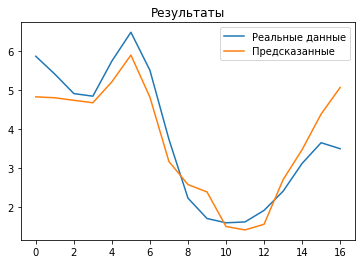

In [18]:
# оцениваем результаты
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

# Создаем новый график
fig, ax = plt.subplots()


# Выполняем предсказание на тестовых данных (X_test - матрица признаков)
y_pred = model.predict(X_test)

# Добавляем данные на график
ax.plot(y_test[7], label='Реальные данные')
ax.plot(y_pred[7], label='Предсказанные')

print(y_test[7])
print(y_pred[7])

ax.legend()
ax.set_title('Результаты')

plt.show()

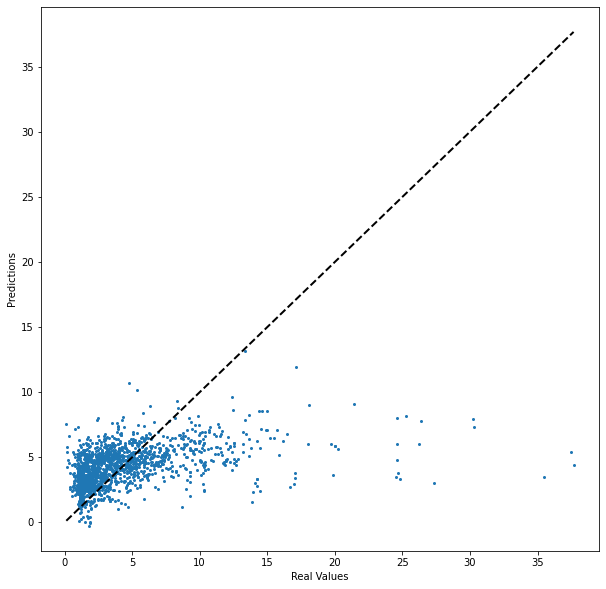

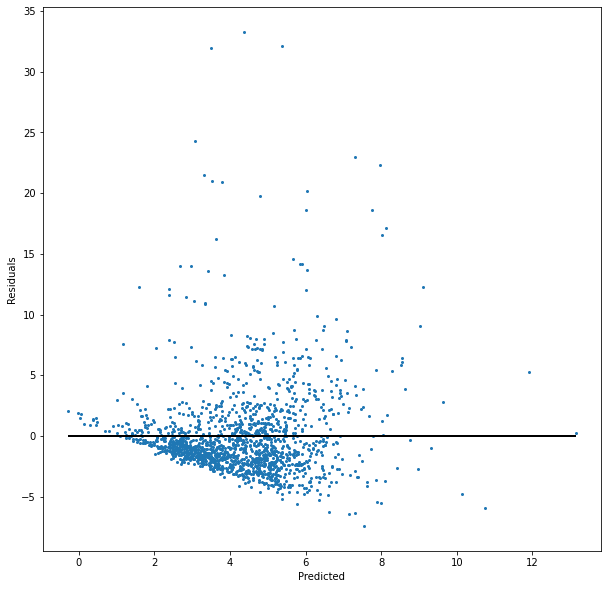

In [55]:
# график предсказанных значений vs реальных значений
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_test, y_pred, s=4)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Real Values')
ax.set_ylabel('Predictions')
plt.show()

# график остатков
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_pred, y_test - y_pred, s=4)
ax.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()

In [56]:
print(y_test[6])
print(y_pred[6])

[3.727872 3.71237  3.695944 3.676287 3.649501 3.608371 3.542146 3.445848
 3.321889 3.170575 2.991014 2.784947 2.555821 2.303542 2.03718  1.766823
 1.496458]
[5.34586857 5.32037606 5.22571421 4.90781642 5.15765816 6.06712372
 6.61249066 5.86896514 5.1441874  4.27370691 3.47778255 2.85831093
 2.74281335 3.13220647 3.71620782 4.62307285 5.56351573]


In [58]:
### Часть для градиентного бустинга

In [61]:
# Попробуем градиентный бустинг
import xgboost as xgb
# Создание объекта для обучения модели
model = xgb.XGBRegressor()
# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

MSE: 21.819218
R2 score: -0.1844957790300376
[4.58634  4.188183 3.78435  3.524673 3.834473 4.834884 5.719469 5.616253
 4.60878  3.416059 2.687841 2.37737  2.067426 1.641794 1.326678 1.205903
 1.195334]
[ 4.3190656  3.7769196  3.5716078  4.077387   3.5959814  4.4106374
  2.8885143  2.4707754  3.007629  22.403864   2.3849432  2.1072416
  1.9576465  1.6097827  2.9152467  1.5874077  2.5835943]


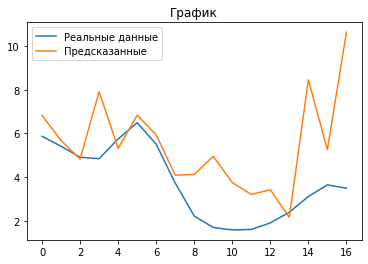

In [65]:
# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print("MSE: %f" % mse)

r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

# Создаем новый график
fig, ax = plt.subplots()


# Выполняем предсказание на тестовых данных (X_test - матрица признаков)
y_pred = model.predict(X_test)

# Добавляем данные на график
ax.plot(y_test[7], label='Реальные данные')
ax.plot(y_pred[7], label='Предсказанные')

print(y_test[4])
print(y_pred[4])

# Настраиваем легенду и заголовок графика
ax.legend()
ax.set_title('График')

# Отображаем график
plt.show()

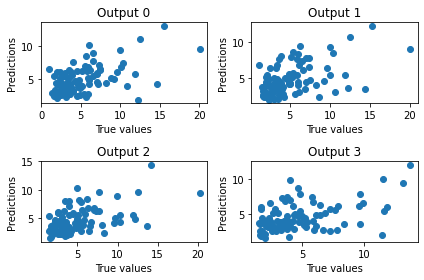

In [63]:
fig, axs = plt.subplots(2, 2)
for i in range(4):
    ax = axs[i//2, i%2]
    ax.scatter(y_test[:, i], y_pred[:, i])
    ax.set_xlabel('True values')
    ax.set_ylabel('Predictions')
    ax.set_title('Output %d' % i)
plt.tight_layout()
plt.show()

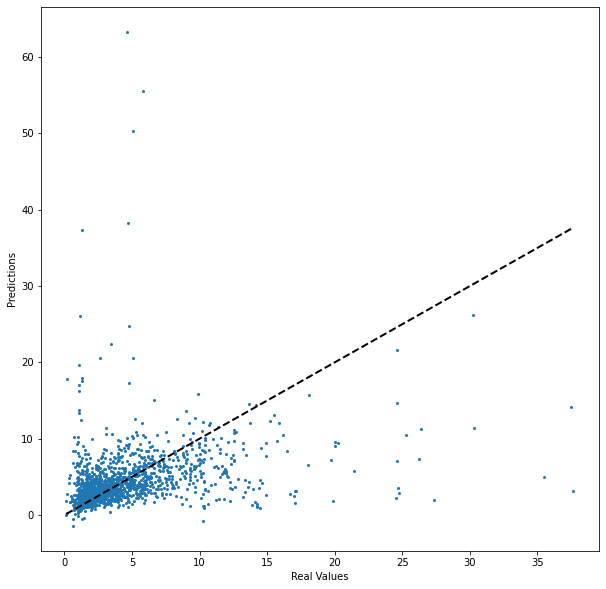

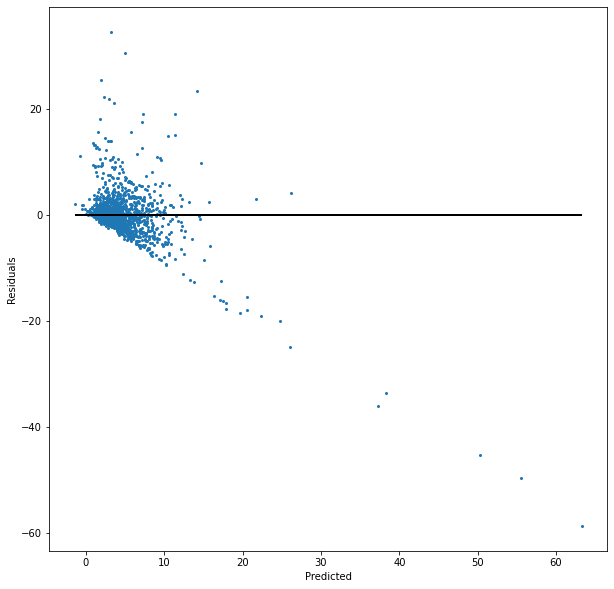

In [64]:
# график предсказанных значений vs реальных значений
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_test, y_pred, s=4)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Real Values')
ax.set_ylabel('Predictions')
plt.show()

# график остатков
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_pred, y_test - y_pred, s=4)
ax.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()

In [66]:
print(y_test[6])
print(y_pred[6])

[3.727872 3.71237  3.695944 3.676287 3.649501 3.608371 3.542146 3.445848
 3.321889 3.170575 2.991014 2.784947 2.555821 2.303542 2.03718  1.766823
 1.496458]
[3.2664516 3.583565  3.3076866 3.8069477 3.2460232 3.272674  3.3695676
 3.2577815 3.480003  3.1193852 2.7936728 2.2371333 1.9712218 1.7558271
 1.8061653 1.6546321 1.5794324]


In [68]:
### Часть для линейной нейронной сети

In [69]:
# Попробуем NN, а именно сеть только с полносвязными слоями
# Input layer -> Dense layer with ReLU activation -> Dense layer with ReLU activation
# -> Dense layer without activation -> Output layer 
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


EPOCH: 0 / 100
16/16 [==============================] - 1s 15ms/step - loss: 5.2597 - val_loss: 4.5978
EPOCH: 1 / 100
16/16 [==============================] - 0s 7ms/step - loss: 4.0883 - val_loss: 3.2046
EPOCH: 2 / 100
16/16 [==============================] - 0s 7ms/step - loss: 2.9063 - val_loss: 2.1966
EPOCH: 3 / 100
16/16 [==============================] - 0s 8ms/step - loss: 2.1285 - val_loss: 1.7535
EPOCH: 4 / 100
16/16 [==============================] - 0s 7ms/step - loss: 1.7741 - val_loss: 1.3934
EPOCH: 5 / 100
16/16 [==============================] - 0s 7ms/step - loss: 1.4394 - val_loss: 1.1342
EPOCH: 6 / 100
16/16 [==============================] - 0s 7ms/step - loss: 1.2153 - val_loss: 0.9385
EPOCH: 7 / 100
16/16 [==============================] - 0s 7ms/step - loss: 0.9920 - val_loss: 0.7968
EPOCH: 8 / 100
16/16 [==============================] - 0s 9ms/step - loss: 0.8655 - val_loss: 0.6780
EPOCH: 9 / 100
16/16 [==============================] - 0s 8ms/step - loss: 0.761

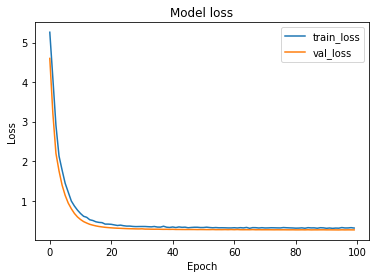

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error
import numpy as np

# Разбиение на обучающую и валидационную выборки
# Разбиение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.17, random_state=29)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=29)

# Задаем архитектуру нейронной сети
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(7,)))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.5))
model.add(Dense(units=17))

loss_history = []
val_loss_history = []

# Компиляция модели
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(lr=0.1))
#model.compile(loss='mse', optimizer=Adam(lr=0.025))
#model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.025)) - worse
#model.compile(loss='mean_absolute_percentage_error', optimizer=Adam(lr=0.025))
num_epochs = 100

# Цикл обучения модели
for epoch in range(num_epochs):
  print(f"EPOCH: {epoch} / {num_epochs}")
  # Обучение модели
  history = model.fit(X_train, y_train, epochs=1, batch_size=25, validation_data=(X_val, y_val))
  loss_history.append(history.history['loss'][0])
  val_loss_history.append(history.history['val_loss'][0])

# Измерение результатов модели на тестовых данных
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Вывод результата
print('Mean Squared Error:', mse)
import matplotlib.pyplot as plt
loss_history = np.array(loss_history)
loss_history.reshape(loss_history.shape[0], -1)
plt.plot(loss_history, label='train_loss')
plt.plot(val_loss_history, label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

MAE: 2.2161412365580477
MSE: 15.938822416850886
R2: -0.02191493767083206


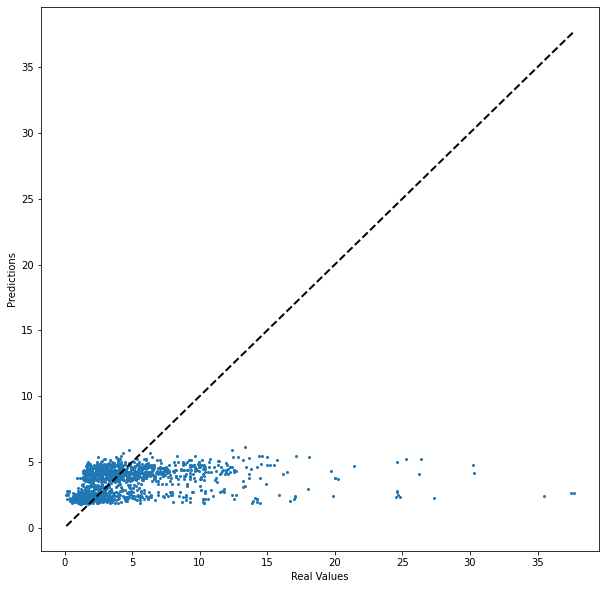

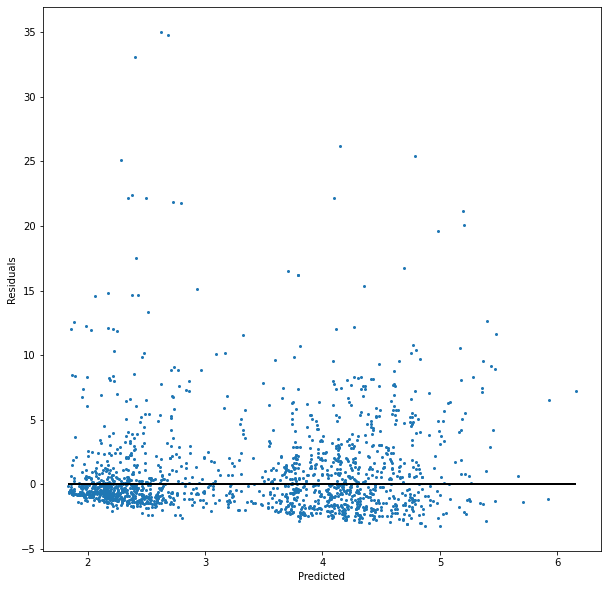

In [77]:
# Вычисляем метрики качества предсказания
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим метрики качества предсказания
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

# график предсказанных значений vs реальных значений
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_test, y_pred, s=4)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Real Values')
ax.set_ylabel('Predictions')
plt.show()

# график остатков
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_pred, y_test - y_pred, s=4)
ax.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()

[2.363452 2.492504 2.62542  2.767078 2.913855 3.043525 3.108503 3.038716
 2.780105 2.396692 1.996494 1.65296  1.39753  1.231053 1.134561 1.078189
 1.03535 ]
[4.2840543 4.2974286 4.180677  4.0410414 4.3003426 4.6871467 4.8364167
 4.2782    3.6838038 2.9816165 2.4578755 2.1870608 2.1056616 2.13652
 2.2480376 2.4603062 2.5120215]


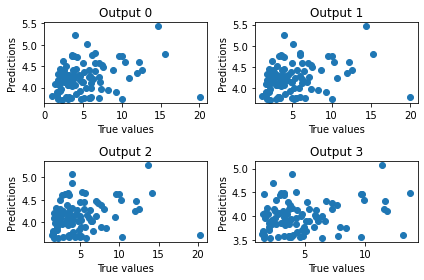

In [78]:
print(y_test[0])
print(y_pred[0])
fig, axs = plt.subplots(2, 2)
for i in range(4):
    ax = axs[i//2, i%2]
    ax.scatter(y_test[:, i], y_pred[:, i])
    ax.set_xlabel('True values')
    ax.set_ylabel('Predictions')
    ax.set_title('Output %d' % i)
plt.tight_layout()
plt.show()

3/3 [==============================] - 0s 3ms/step
[4.58634  4.188183 3.78435  3.524673 3.834473 4.834884 5.719469 5.616253
 4.60878  3.416059 2.687841 2.37737  2.067426 1.641794 1.326678 1.205903
 1.195334]
[4.27902   4.292298  4.175824  4.0363693 4.2952986 4.6816235 4.83063
 4.2729244 3.6793246 2.9780555 2.4550173 2.1847432 2.1032538 2.1340709
 2.2454593 2.4575388 2.5091953]


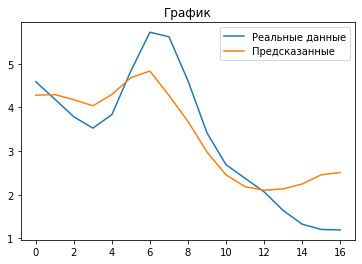

In [79]:
# Создаем новый график
fig, ax = plt.subplots()

# Выполняем предсказание на тестовых данных (X_test - матрица признаков)
y_pred = model.predict(X_test)

# Добавляем данные на график
ax.plot(y_test[4], label='Реальные данные')
ax.plot(y_pred[4], label='Предсказанные')

print(y_test[4])
print(y_pred[4])

# Настраиваем легенду и заголовок графика
ax.legend()
ax.set_title('График')

# Отображаем график
plt.show()

In [80]:
# Попробуем на сверточной NN

EPOCH: 0 / 100
14/14 [==============================] - 2s 30ms/step - loss: 2.2209 - val_loss: 1.7785
EPOCH: 1 / 100
14/14 [==============================] - 0s 14ms/step - loss: 1.1424 - val_loss: 0.3816
EPOCH: 2 / 100
14/14 [==============================] - 0s 13ms/step - loss: 0.6213 - val_loss: 0.3224
EPOCH: 3 / 100
14/14 [==============================] - 0s 14ms/step - loss: 0.4834 - val_loss: 0.3450
EPOCH: 4 / 100
14/14 [==============================] - 0s 10ms/step - loss: 0.4409 - val_loss: 0.2988
EPOCH: 5 / 100
14/14 [==============================] - 0s 10ms/step - loss: 0.4305 - val_loss: 0.3120
EPOCH: 6 / 100
14/14 [==============================] - 0s 11ms/step - loss: 0.4136 - val_loss: 0.2931
EPOCH: 7 / 100
14/14 [==============================] - 0s 10ms/step - loss: 0.4162 - val_loss: 0.2963
EPOCH: 8 / 100
14/14 [==============================] - 0s 11ms/step - loss: 0.3945 - val_loss: 0.2856
EPOCH: 9 / 100
14/14 [==============================] - 0s 9ms/step - los

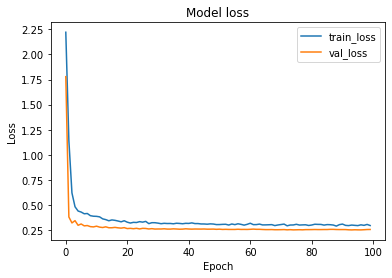

In [81]:
# Попробуем сверточную нейроную сеть
import tensorflow as tf

# Задаем размерность входных данных
input_shape = (7, 1)

# Разбиение на обучающую и валидационную выборки
# Разбиение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.17, random_state=29)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=29)

# Создаем модель сверточной нейронной сети
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Dropout(0.5))
#model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(units=17, activation='linear'))

# Компиляция модели
#model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(lr=0.06))

model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(lr=0.3))
num_epochs = 100

loss_history = []
val_loss_history = []

# Цикл обучения модели
for epoch in range(num_epochs):
  print(f"EPOCH: {epoch} / {num_epochs}")
  # Обучение модели
  history = model.fit(X_train, y_train, epochs=1, batch_size=29, validation_data=(X_val, y_val))
  loss_history.append(history.history['loss'][0])
  val_loss_history.append(history.history['val_loss'][0])

# Измерение результатов модели на тестовых данных
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Вывод результата
print('Mean Squared Error:', mse)
import matplotlib.pyplot as plt
loss_history = np.array(loss_history)
loss_history.reshape(loss_history.shape[0], -1)
plt.plot(loss_history, label='train_loss')
plt.plot(val_loss_history, label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

MAE: 2.206691043270837
MSE: 15.965043840323844
R2: -0.023738963576176945


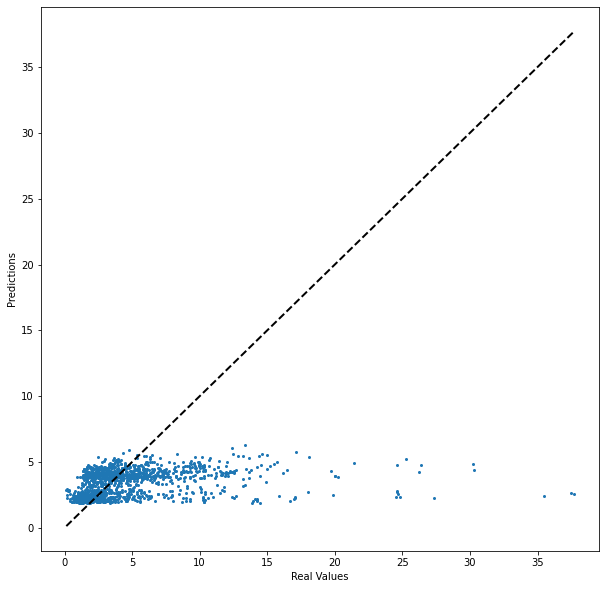

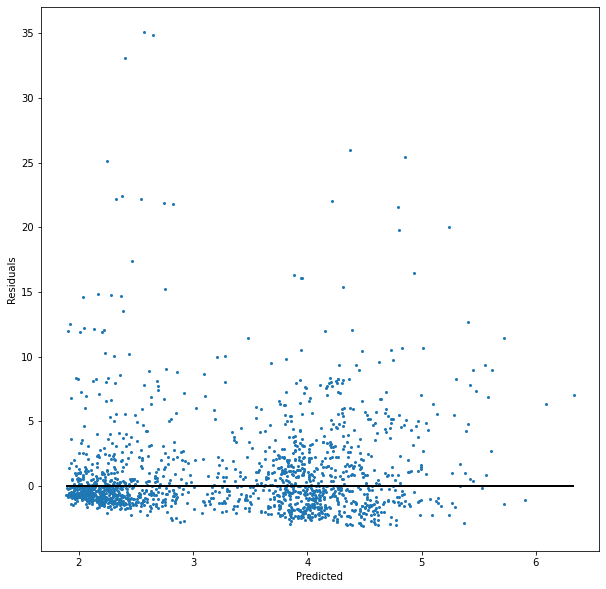

In [82]:
# Вычисляем метрики качества предсказания
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим метрики качества предсказания
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

# график предсказанных значений vs реальных значений
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_test, y_pred, s=4)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Real Values')
ax.set_ylabel('Predictions')
plt.show()

# график остатков
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_pred, y_test - y_pred, s=4)
ax.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()

[2.363452 2.492504 2.62542  2.767078 2.913855 3.043525 3.108503 3.038716
 2.780105 2.396692 1.996494 1.65296  1.39753  1.231053 1.134561 1.078189
 1.03535 ]
[4.091047  4.0675898 4.009741  3.8040771 4.068792  4.523374  4.5476627
 4.030624  3.4216995 2.7891529 2.3398225 2.089298  2.028894  2.0573432
 2.188664  2.312097  2.397764 ]


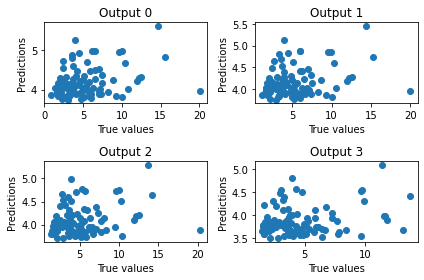

In [83]:
print(y_test[0])
print(y_pred[0])
fig, axs = plt.subplots(2, 2)
for i in range(4):
    ax = axs[i//2, i%2]
    ax.scatter(y_test[:, i], y_pred[:, i])
    ax.set_xlabel('True values')
    ax.set_ylabel('Predictions')
    ax.set_title('Output %d' % i)
plt.tight_layout()
plt.show()

3/3 [==============================] - 0s 4ms/step
[3.953258 3.937111 3.959007 4.302918 5.4904   6.050741 4.130142 2.390642
 1.952002 2.140375 2.272052 2.163881 1.799856 1.450778 1.334617 1.421954
 1.593803]
[3.9175081 3.919354  3.864397  3.6599264 3.9222665 4.344021  4.351165
 3.8371832 3.2511265 2.6527557 2.2405431 2.0030894 1.961909  1.9828836
 2.1074026 2.2109194 2.2964134]


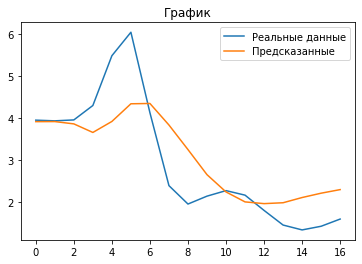

In [85]:
# Создаем новый график
fig, ax = plt.subplots()

# Выполняем предсказание на тестовых данных (X_test - матрица признаков)
y_pred = model.predict(X_test)

# Добавляем данные на график
ax.plot(y_test[10], label='Реальные данные')
ax.plot(y_pred[10], label='Предсказанные')

print(y_test[10])
print(y_pred[10])

# Настраиваем легенду и заголовок графика
ax.legend()
ax.set_title('График')

# Отображаем график
plt.show()

In [86]:
# Попробуем AutoML

In [90]:
# Попробуем AutoML
# Для разрешения проблем с зависимостями
!pip uninstall auto-sklearn
!pip install scikit-learn==1.0.0
# установка библиотеки Auto-sklearn
#!pip install auto-sklearn
#from autosklearn.regression import AutoSklearnRegressor

Found existing installation: auto-sklearn 0.15.0
Uninstalling auto-sklearn-0.15.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/auto_sklearn-0.15.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/autosklearn/*
Proceed (Y/n)? y
  Successfully uninstalled auto-sklearn-0.15.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 1.0 which is incompatible.


In [1]:
!pip install auto-sklearn
from autosklearn.regression import AutoSklearnRegressor
# настройка параметров
time_left_for_this_task = 1000 # ограничение времени в секундах
per_run_time_limit = 100 # ограничение времени в секундах на одну модель
ensemble_size = 8 # размер ансамбля моделей

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# создание объекта регрессора Auto-sklearn
model = AutoSklearnRegressor(
    time_left_for_this_task=time_left_for_this_task,
    per_run_time_limit=per_run_time_limit,
    ensemble_size=ensemble_size,
    n_jobs=-1, # использование всех доступных ядер процессора
    seed=29, # задание случайного зерна для повторяемости
    #metric="mean_squared_error" # метрика оценки качества модели
)
# обучение модели
model.fit(X_train, y_train)

<ipython-input-21-b711bf236f9a>:2: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 7}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  model = AutoSklearnRegressor(


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     ensemble_kwargs={'ensemble_size': 7}, ensemble_size=7,
                     n_jobs=-1, per_run_time_limit=90, seed=29,
                     time_left_for_this_task=800)

{52: {'model_id': 52, 'rank': 1, 'cost': 0.8867473142845274, 'ensemble_weight': 0.42857142857142866, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fab22de6c10>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fab214814c0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fab21481580>, 'sklearn_regressor': RandomForestRegressor(bootstrap=False, criterion='mae',
                      max_features=0.41714654630410597, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=512, n_jobs=1,
                      random_state=29, warm_start=True)}, 95: {'model_id': 95, 'rank': 2, 'cost': 0.8988075103738327, 'ensemble_weight': 0.14285714285714288, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fab286c6070>, 'feature_preprocessor': <autosklearn.pi

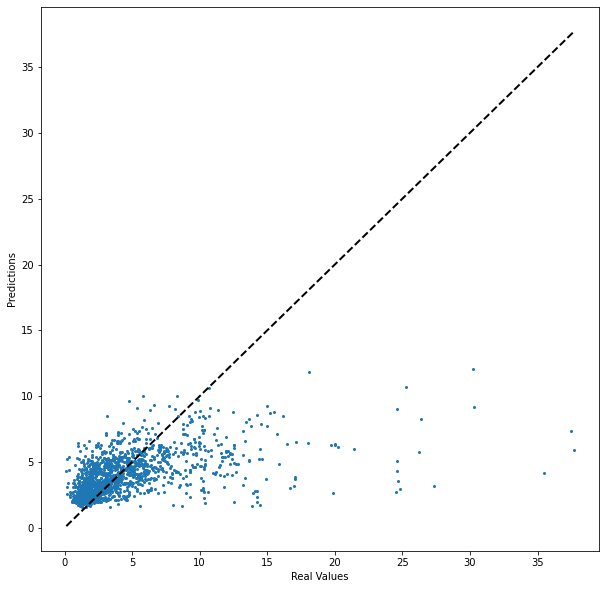

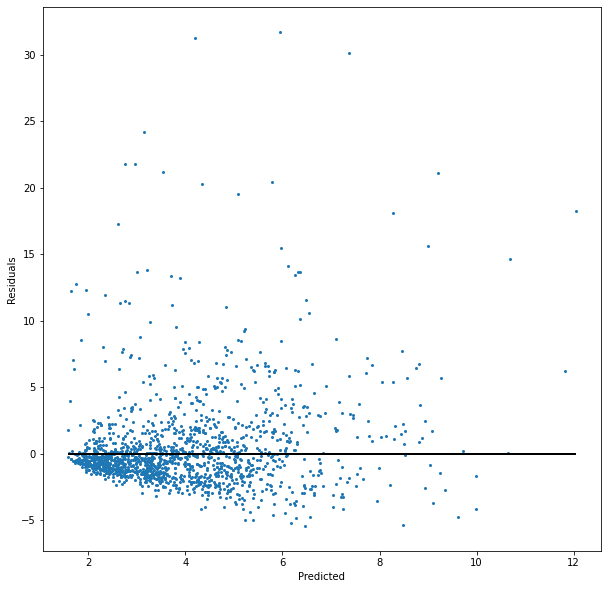

In [22]:
# выводим наилучшую модель
print(model.show_models())

# оценка качества модели на тестовом наборе данных
y_pred = model.predict(X_test)

# Вычисляем метрики качества предсказания
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим метрики качества предсказания
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

# график предсказанных значений vs реальных значений
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_test, y_pred, s=4)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Real Values')
ax.set_ylabel('Predictions')
plt.show()

# график остатков
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_pred, y_test - y_pred, s=4)
ax.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()

[3.953258 3.937111 3.959007 4.302918 5.4904   6.050741 4.130142 2.390642
 1.952002 2.140375 2.272052 2.163881 1.799856 1.450778 1.334617 1.421954
 1.593803]
[5.07959473 5.02297229 4.86826414 4.67359263 5.23476106 6.45012558
 5.70182902 4.06819504 3.18947884 2.62091479 2.16468415 1.92323905
 1.92959577 2.25478223 2.57143515 3.26983762 4.0254091 ]


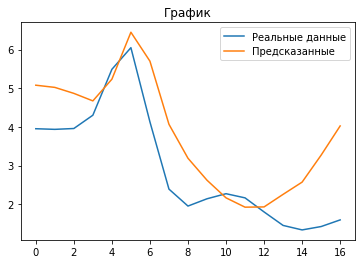

In [23]:
# Создаем новый график
fig, ax = plt.subplots()

# Выполняем предсказание на тестовых данных (X_test - матрица признаков)
y_pred = model.predict(X_test)

# Добавляем данные на график
ax.plot(y_test[10], label='Реальные данные')
ax.plot(y_pred[10], label='Предсказанные')

print(y_test[10])
print(y_pred[10])

# Настраиваем легенду и заголовок графика
ax.legend()
ax.set_title('График')

# Отображаем график
plt.show()

In [27]:
import autosklearn
# настройка параметров
time_left_for_this_task = 1000 # ограничение времени в секундах
per_run_time_limit = 100 # ограничение времени в секундах на одну модель
ensemble_size = 8 # размер ансамбля моделей

# создание объекта регрессора Auto-sklearn
model = AutoSklearnRegressor(
    time_left_for_this_task=time_left_for_this_task,
    per_run_time_limit=per_run_time_limit,
    ensemble_size=ensemble_size,
    n_jobs=-1, # использование всех доступных ядер процессора
    seed=29, # задание случайного зерна для повторяемости
    metric=autosklearn.metrics.mean_absolute_error # метрика оценки качества модели
)
# обучение модели
model.fit(X_train, y_train)

<ipython-input-27-5af96aaba227>:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 8}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  model = AutoSklearnRegressor(


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     ensemble_kwargs={'ensemble_size': 8}, ensemble_size=8,
                     metric=mean_absolute_error, n_jobs=-1,
                     per_run_time_limit=100, seed=29,
                     time_left_for_this_task=1000)

{38: {'model_id': 38, 'rank': 1, 'cost': 1.9479330535249393, 'ensemble_weight': 0.5, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fab19dcabe0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fab286613a0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fab28252fa0>, 'sklearn_regressor': ExtraTreesRegressor(criterion='mae', max_features=0.7085257476987034,
                    min_samples_leaf=3, min_samples_split=12, n_estimators=512,
                    n_jobs=1, random_state=29, warm_start=True)}, 43: {'model_id': 43, 'rank': 2, 'cost': 1.9631664994720222, 'ensemble_weight': 0.125, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fab28252dc0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at

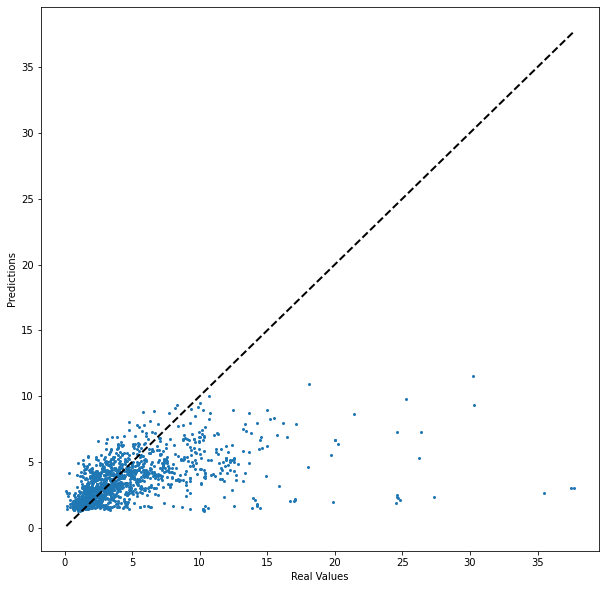

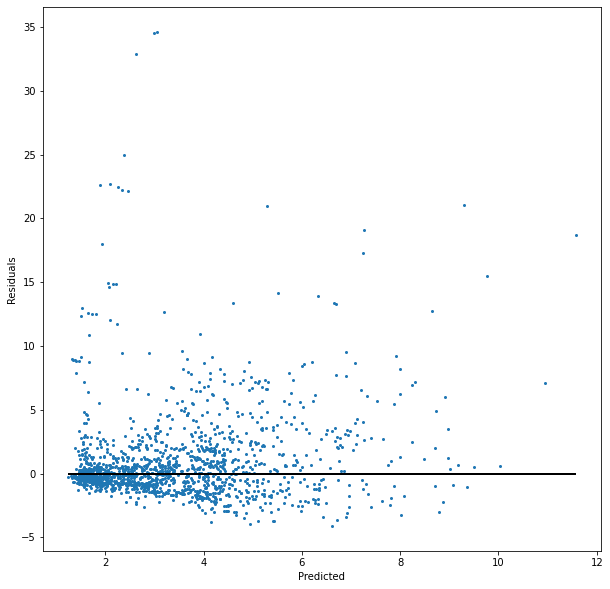

In [28]:
# выводим наилучшую модель
print(model.show_models())

# оценка качества модели на тестовом наборе данных
y_pred = model.predict(X_test)

# Вычисляем метрики качества предсказания
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим метрики качества предсказания
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

# график предсказанных значений vs реальных значений
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_test, y_pred, s=4)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Real Values')
ax.set_ylabel('Predictions')
plt.show()

# график остатков
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_pred, y_test - y_pred, s=4)
ax.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()

[3.953258 3.937111 3.959007 4.302918 5.4904   6.050741 4.130142 2.390642
 1.952002 2.140375 2.272052 2.163881 1.799856 1.450778 1.334617 1.421954
 1.593803]
[4.0772934  4.0304209  3.9029763  3.78545514 4.43099138 5.06088626
 4.6236327  3.61711508 2.86391398 2.36156669 1.99917468 1.75805345
 1.6292789  1.62104422 1.6189784  1.74772786 1.91296285]


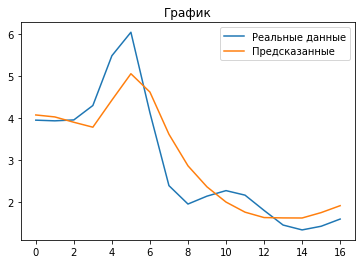

In [33]:
# Создаем новый график
fig, ax = plt.subplots()

# Выполняем предсказание на тестовых данных (X_test - матрица признаков)
y_pred = model.predict(X_test)

# Добавляем данные на график
ax.plot(y_test[10], label='Реальные данные')
ax.plot(y_pred[10], label='Предсказанные')

print(y_test[10])
print(y_pred[10])

# Настраиваем легенду и заголовок графика
ax.legend()
ax.set_title('График')

# Отображаем график
plt.show()